## Project Based Learning Case

Disini akan dihadapi sebuah kasus dimana sebuah perusahaan ingin meningkatkan penjualan. Perusahaan memberikan strategi dengan meningkatkan pelatihan pada sales, sebelum pelatihan sales ini rata-rata memiliki penjualan $100.

In [23]:
#Import Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [33]:
#Create DataFrame
df = pd.read_excel("Transactions Amount.xlsx")
df.head()

,Transactions Amount
0,100
1,150
2,50
3,100
4,130


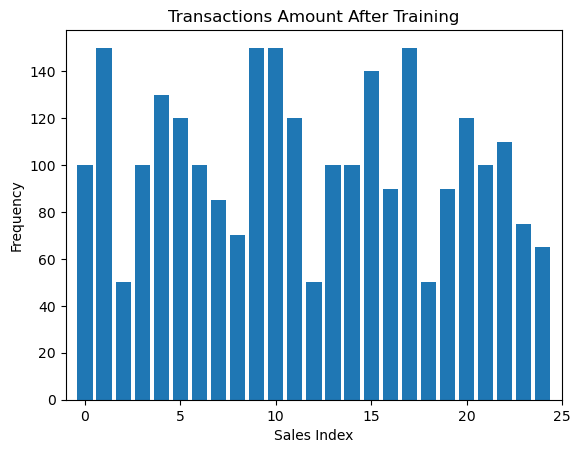

In [25]:
fig, ax = plt.subplots()

ax.bar(df.index, df["Transactions Amount"])

ax.set_ylabel('Frequency')
ax.set_xlabel('Sales Index')
ax.set_xlim(-1,25)
ax.set_title('Transactions Amount After Training')

plt.show()

# Central Tendency

In [26]:
import statistics

"print mean, median, mode"

print("Mean = ", statistics.mean(df["Transactions Amount"]))
print("Median = ", statistics.median(df["Transactions Amount"]))
print("Modus = ", statistics.mode(df["Transactions Amount"]))


Mean =  102.6
Median =  100
Modus =  100


# Analisis Central Tendency

Terlihati dari sini bahwa nilai mean, median, dan modus ini berada pada rentang nilai yang cukup berdekatan yaitu diangka 100, angka ini 
sama dengan rata-rata penjualan sebelum dilakukannya transaksi sales. Secara singkat, disini menunjukan bahwa training memiliki impact yang
rendah pada peningkatan penjualan signifikan

In [27]:
#Variability
"""
print var
print std
print max & min
print quantile 0.25
print quantile 0.5
print quantile 0.75

"""
print("Variance=", np.var(df["Transactions Amount"]))
print("Standard Deviasi=", np.std(df["Transactions Amount"]))
print("Max=", np.max(df["Transactions Amount"]), ".Min= ",np.min(df["Transactions Amount"]))
print("Range=", np.max(df["Transactions Amount"])-np.min(df["Transactions Amount"]))
print("Q(1)=", np.quantile(df["Transactions Amount"], 0.25))
print("Q(2)=", np.quantile(df["Transactions Amount"], 0.50))
print("Q(3)=", np.quantile(df["Transactions Amount"], 0.75))


Variance= 972.2399999999997
Standard Deviasi= 31.180763300471007
Max= 150 .Min=  50
Range= 100
Q(1)= 85.0
Q(2)= 100.0
Q(3)= 120.0


## Analisis Variability

Melihat nilai standar deviasi diangka 31,18 ini memperlihatkan bahwa data yang didapatkan cukuplah beragam. Nilai ini memiliki rentang nilai yang cukup lebar dimana bila nilai mean plus minus standar deviasi, maka nilai nilainya sudah jauh dari nilai Q2 atau nilai median, atau sudah masuk ke area Q1 atau Q3, sehingga dapat disimpulkan sementara bahwa efek dari training tidak terlihat pada keseragaman data ini

# Define H0 and H1
### H0: Tidak terjadi peningkatan penjualan
### H1: Meningkatkan penjualan
### alpha = 0.05

In [28]:
#Calculate t statistics and P-value
#Perform one sample t-test

statistik, pvalue = stats.ttest_1samp(a=df["Transactions Amount"], popmean=100)

In [29]:
#T-statistic= , pvalue=
print("nilai T stats=", statistik)
print("nilai pvalue=", pvalue)

nilai T stats= 0.4085001556802841
nilai pvalue= 0.6865284813438117


In [30]:
#Conclude with alpha and p-value
print("pvalue>alpha?", pvalue>0.05)

pvalue>alpha? True


# Conclusion: 
Dikarenakan pValue > alpha, Hipotesis H0 terbukti atau gagal menolak H0.
Sehingga training dikatakan gagal!

In [31]:
#Conclude with t statistics and critical region
#Find the critical region

#H1 > 100, posisi berada di kanan
cr = stats.t.ppf(1-0.05,len(df["Transactions Amount"])-1)
cr

1.7108820799094275

### H1: Penjualan > 100

In [32]:
#Critical region result
print("T Statistik > Critical Region?", statistik>cr)

T Statistik > Critical Region? False


# Conclusion: 

Karena T statistik berada dibawah Critical Region, maka kita gagal menolak H0, atau training gagal memberikan peningkatan penjualan!